<a href="https://colab.research.google.com/github/kvik18/project_games/blob/main/games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование рынка компьтерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и в 2016 году спланировать рекламные кампании на 2017 год.

## План работ
1. Просмотр, оценка и предобработка имеющихся данных.
2. Подсчет суммарных продаж.
3. Изменение продаж по платформам во времени.
4. Влияние отзывов и рейтинга на продажи.
5. Портрет пользователя каждого региона.
6. Проверка гипотез.

## Подготовка данных

In [4]:
# Импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats as st
import math
import datetime as dt
import matplotlib.pyplot as plt

Прочитаю данный файл, просмотрю, получу общую информацию, проверю на пропуски и дубликаты.

In [5]:
# чтение и просмотр файла с данными
#df_games = pd.read_csv('games.csv')
#df_games = pd.read_csv('/datasets/games.csv')
df_games = pd.read_csv('games.csv')
df_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
# получение общей информацию о данных в таблице
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Данные за 2016 год могут быть неполными.
## Предобработка данных
### Стиль заголовков
Исправлю стиль в названиях  столбцов: приведу названия столбцов к нижнему регистру.

In [52]:
# приведу названия всех столбцов к нижнему регистру
df_games.columns = df_games.columns.str.lower()
df_games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11448,Pro Evolution Soccer 2008 (JP sales),DS,2007.0,Sports,0.00,0.00,0.08,0.00,NaN,NaN,NaN,0.08
8481,F1 Championship Season 2000,PS2,2000.0,Racing,0.06,0.05,0.03,0.02,71.0,NaN,E,0.16
7641,The Cheetah Girls: Passport to Stardom,DS,2008.0,Misc,0.18,0.00,0.00,0.01,NaN,NaN,E,0.19
12655,Dig Dug: Digging Strike,DS,2005.0,Puzzle,0.05,0.00,0.00,0.00,65.0,NaN,E,0.05
13774,Chicken Blaster,DS,2009.0,Shooter,0.04,0.00,0.00,0.00,NaN,NaN,E10+,0.04


Теперь в названиях всех столбцов таблицы используются английские слова, строчные буквы, змеиный регистр. Нарушение стиля устранено.
### Преобразование типа данных
Столбец year_of_release содержит данные типа float. Год выпуска - число целое. Но в столбце есть пропуски, поэтому пока не могу изменить тип данных на целочисленный.

Столбец user_score содержит оценку пользователей. Из описания следует, что она содержит численные значения, но сейчас ее тип object. Просмотрю унакальные значения столбца.

In [8]:
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец user_score содержит численные значения, пропуски NaN и значения с аббревиатурой 'tbd'. Наличие этого значения повлияло на тип столбца. 

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.

Как поясняет ресурс www.metacritic.com: "Чтобы гарантировать, что оценка точно отражает отзывы пользователей о конкретной игре, сервис не отображает оценку для тех игр, которые не имеют по крайней мере 4 отзывов в их базе данных, а показывает tbd. Как только будет достигнуто это минимальное количество отзывов, отобразится оценка". 

То есть 'tbd' означает то же, что и NaN. Переведу значения столбца user_score из строк в числа, значения 'tbd' заменятся на NaN при обработке ошибок. 

In [9]:
# Переведу значения столбца user_score из строк в числа 
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games['user_score'].dtype

dtype('float64')


Теперь тип столбца user_score численный. Типы других стобцов соответствуют данным.
### Пропуски данных
В данных есть пропущенные значения.


In [10]:
# подсчет абсолютного и относительного количества пропусков
total = df_games.isna().sum().sort_values(ascending=False)
zpercent = ((df_games.isna().sum()/df_games.isna().count()).sort_values(ascending=False)*100).round(2)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data.head(20)

,total,percent
user_score,9125,54.59
critic_score,8578,51.32
rating,6766,40.48
year_of_release,269,1.61
name,2,0.01
genre,2,0.01
platform,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


<function matplotlib.pyplot.show(*args, **kw)>

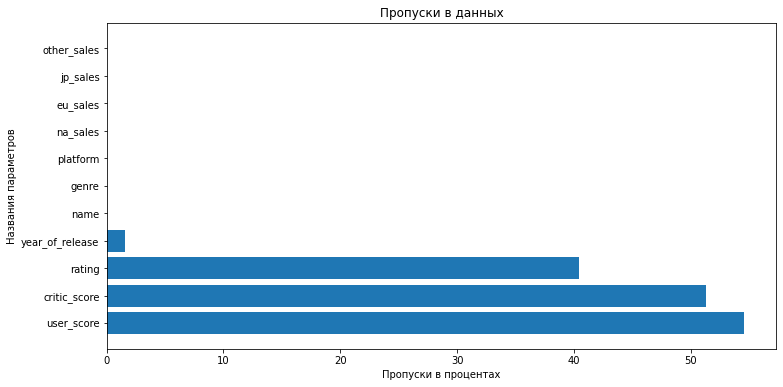

In [11]:
# столбчатая диаграмма пропусков в данных
f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.barh(missing_data.index, missing_data['percent'])
plt.title('Пропуски в данных')
plt.xlabel('Пропуски в процентах')
plt.ylabel('Названия параметров')
plt.show

Половина данных пропущена в столбцах critic_score, rating и user_score. Причем, в большинстве случаев, пропущены данные сразу во всех этих колонках. На первый взгляд, этих данных нет для старых игр. Возможно, до какого-то времени такие рейтинги не существовали, не существовало такой организации как ESRB, или данные не собирались централизованно. Проверю.

In [53]:
# игры с пропусками в столбце critic_score
df_games.loc[df_games['critic_score'].isna()].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16281,Sakura-Sou no Pet na Kanojo,PSP,2013.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
6351,Jikkyou Powerful Pro Yakyuu 2,SNES,1995.0,Sports,0.00,0.00,0.27,0.00,NaN,NaN,NaN,0.27
15938,Kadenz fermata//Akkord:fortissimo,PSV,2014.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
13152,Fighter Destiny 2,N64,1999.0,Fighting,0.04,0.01,0.00,0.00,NaN,NaN,NaN,0.05
8627,Watchmen: The End is Nigh - The Complete Exper...,PS3,2009.0,Action,0.08,0.06,0.00,0.02,NaN,NaN,NaN,0.16


Нет, версия не подтвердилась. Пропуски в столбцах critic_score, rating и user_score есть как в старых, так и современных играх. Невозможно заполнить пропущенные значения как среднее рейтингов игр того же жанра. Оставлю пока без изменений.

Пропуски в столбце rating обработаю позже.

Столбец year_of_release имеет 1,6% пропусков.  Пропущенный год выпуска игры можно узать в интернете. Но пропусков 264 и процесс их заполнения нужно как-то автоматизировать. Не буду заниматься здесь этой задачей. Данных достаточно для анализа, ставлю пока без изменений.

В остальных колонках пропусков нет, или их количество незначительно.

### Дубликаты

In [13]:
# подсчет дубликатов
df_games.duplicated().sum()

0

Дубликатов в данных нет

### Суммарные продажи во всех регионах
* Запишу суммарные продажи во всех регионах в отдельный столбец.

In [14]:
# суммарные продажи во всех регионах
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

## Исследовательский анализ данных
### Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?

In [15]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


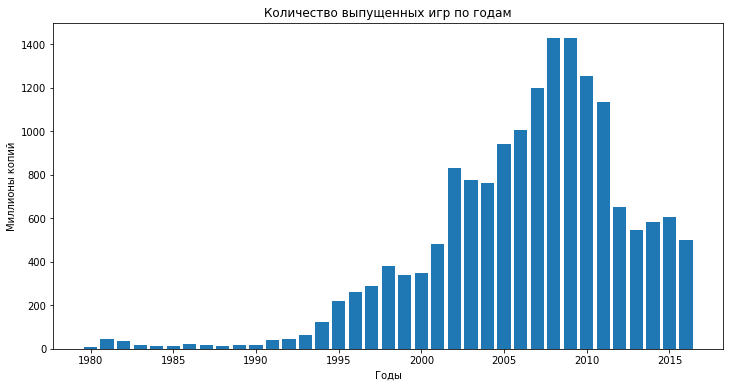

In [16]:
# количество выпущенных игр по годам
df_games_grouped = df_games.groupby('year_of_release')['platform'].count()
# столбчатая диаграмма
f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(df_games_grouped.index, df_games_grouped.values)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Годы')
plt.ylabel('Миллионы копий')
plt.show()

До 1995 года игр, по сравнению с двухтысячными, почти не было. Потом наступила эра доступных персональных компьютеров и игровых приставок. С 2002 по 2008 годы производство игр резко растет с 500 до 1400 млн копий. В 2012 году произошел резкий спад продаж до 600 млн копий, возможно, связанный с развитием смартфонов.

### Как менялись продажи по платформам
Посмотрим, как менялись продажи по платформам. Для платформ с наибольшими суммарными продажами построю распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

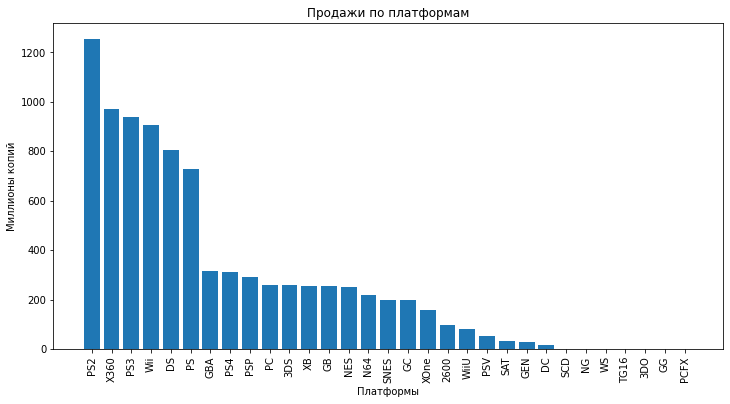

In [17]:
# суммарные продажи по платформам по убыванию
df_games_grouped = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(df_games_grouped)
# столбчатая диаграмма
f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(df_games_grouped.index, df_games_grouped.values)
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Миллионы копий')
plt.xticks(rotation = 90) 
plt.show()

По продажам лидируют платформы PS2, X360, PS3, Wii, DS, PS с заметным отрывом. Построю для этих платформ распределение продаж по годам. 

In [18]:
# срез данных по 6 лидерам продаж
df_games_6 = df_games_grouped.head(6)
df_games_6

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: total_sales, dtype: float64

In [19]:
# отсортирую уникальные годы, за которые есть данные
np.sort(df_games['year_of_release'].dropna().unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

Построю сводные таблицы продаж по годам для каждой платформы из топ-6 и объединю их.
Удалю пропуски и отсортирую уникальные годы в колонке year_of_release, изменю тип данных на целочисленный.

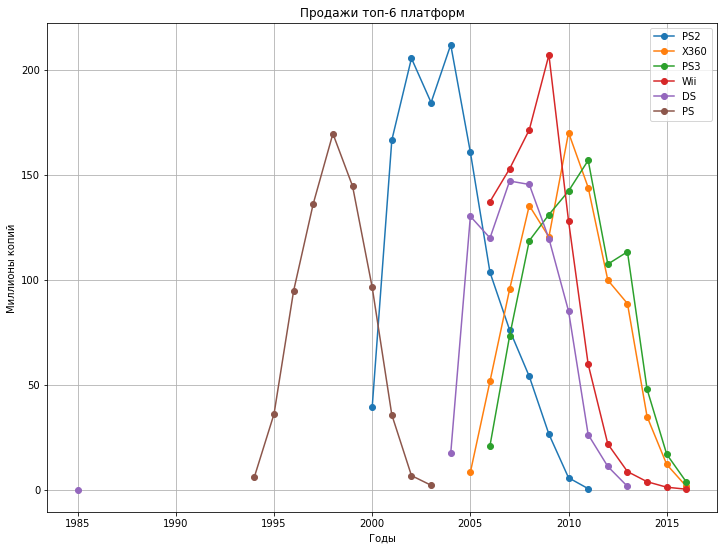

In [20]:
# годы будут индексом сводной таблицы
index = np.sort(df_games['year_of_release'].dropna().unique()).astype('int')
df_years_6 = pd.DataFrame(index=index)
for i in df_games_6.index: 
    df_years_6[str(i)] = df_games.query('platform == @i') \
      .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

# график продаж по топ-6 платформам
df_years_6.plot(style='o-', figsize=(12,9), grid=True)
plt.title('Продажи топ-6 платформ')
plt.xlabel('Годы')
plt.ylabel('Миллионы копий')
plt.show()

In [21]:
# рассчитаю время жизни платформ из топ-6
print('Время жизни платформ:')
list_platform_lifes = [{'platform':col_name, 'lifespan':col_data.count()} for (col_name, col_data) in df_years_6.iteritems()]
df_platform_lifes = pd.DataFrame(list_platform_lifes)
display(df_platform_lifes)
print('Средняя продолжительность жизни платформы %.0f лет.' % df_platform_lifes.lifespan.mean())

Время жизни платформ:


,platform,lifespan
0,PS2,12
1,X360,12
2,PS3,11
3,Wii,11
4,DS,11
5,PS,10


Средняя продолжительность жизни платформы 11 лет.


Средняя продолжительность жизни платформы 11 лет. На графике "Продажи топ-6 платформ" видно, что 4 из 6 самых популярных платформ вышли в 2005 году, а две оставшиеся в это время заканчивали свой жизненный цикл.
### Актуальный период

Компьютерные игры - динамично меняющаяся индустрия. Для постоения прогноза на 2017 актуальным будет период 2 года. Поскольку игры выпуска 2014 года могли начать продаваться в конце года и оказывать больше влиять на рынок 2015 года, сформирую датафрейм, содержащий игры 2014-2016 годов, и дальше буду работать с ним.

Построю график продаж за выбранный период.

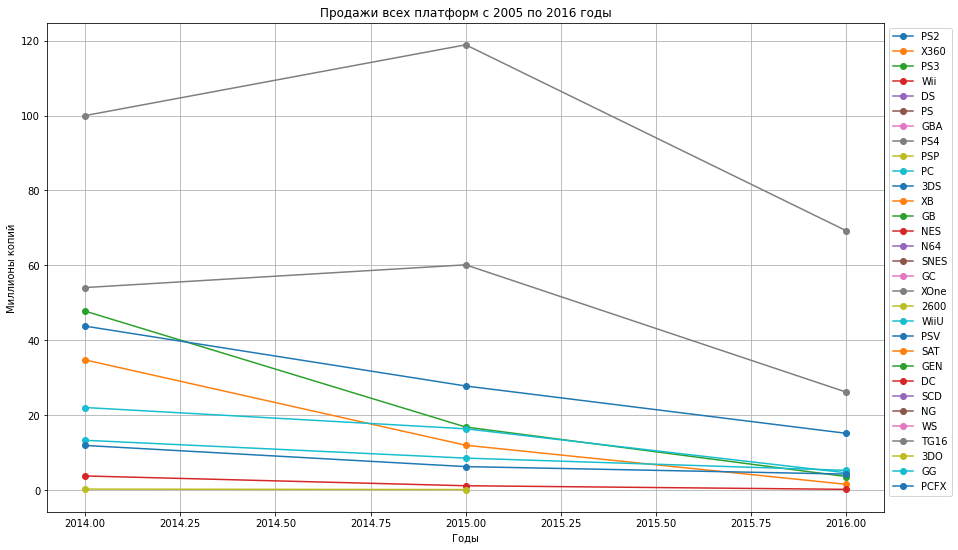

In [22]:
# построю сводную таблицу продаж для всех платформ в 2014-2016 годах
index = index[index >= 2014]
df_years = pd.DataFrame(index=index)
for i in df_games_grouped.index: 
    df_years[str(i)] = df_games.query('platform == @i') \
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

# график продажи всех платформ с 2014 по 2016 годы
df_years.plot(style='o-', figsize=(15,9), grid=True)
plt.title('Продажи всех платформ с 2005 по 2016 годы')
plt.xlabel('Годы')
plt.ylabel('Миллионы копий')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [23]:
# Рынок игровых платформ 2016
ser_platforms_2016 = df_years.loc[2016].sort_values(ascending=False).dropna()
ser_platforms_2016

PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: 2016, dtype: float64

В 2016 году больше всего продаж у платформ PS4, XOne, 3DS.
График показывает, что количество проданных игр и для этих платформ снижается. Рынок игр падает.

Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [24]:
# отберу из исходной таблицы данные по продажам игр с 2014 по 2016 годы
df_games_modern = df_games.query('year_of_release >= 2014').copy()

# отберу данные по конкретной платформе: PS4, XOne, 3DS
df_games_ps4 = df_games_modern.query('platform == "PS4"')
df_games_xone = df_games_modern.query('platform == "XOne"')
df_games_3ds = df_games_modern.query('platform == "3DS"')

In [25]:
# посмотрю разброс значений, среднее и медиану количества проданных игр по платформам
df_3 = pd.DataFrame()
df_3['ps4'] = df_games_ps4['total_sales'].describe()
df_3['xone'] = df_games_xone['total_sales'].describe()
df_3['3ds'] = df_games_3ds['total_sales'].describe()
df_3

,ps4,xone,3ds
count,376.000000,228.000000,212.000000
mean,0.766356,0.615614,0.408868
std,1.614969,1.046513,1.188368
min,0.010000,0.010000,0.010000
25%,0.057500,0.050000,0.030000
50%,0.185000,0.205000,0.090000
75%,0.690000,0.632500,0.250000
max,14.630000,7.390000,11.680000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


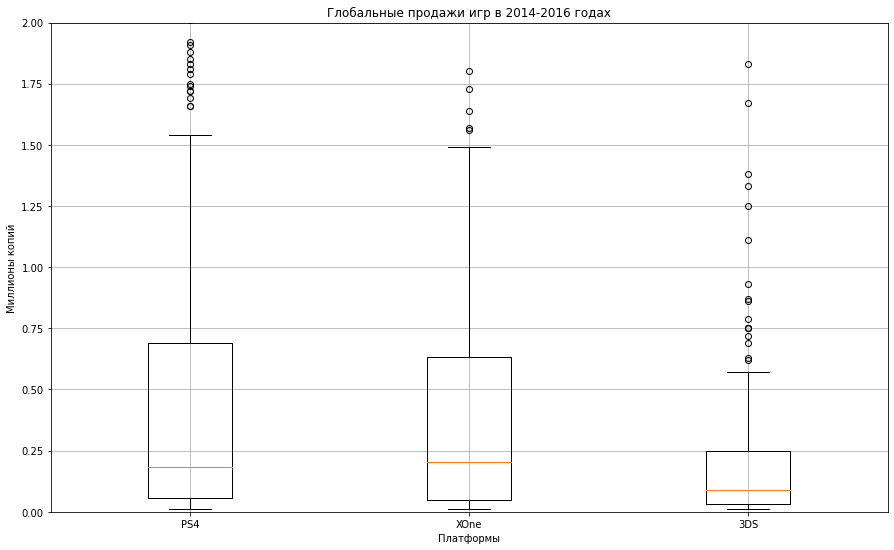

In [26]:
# диаграмма размаха: глобальные продажи игр в разбивке по платформам в 2014-2016 годах
data = [df_games_ps4['total_sales'], df_games_xone['total_sales'], df_games_3ds['total_sales']]
# Multiple box plots on one Axes
fig, ax = plt.subplots(figsize=(15,9))
ax.grid()
ax.set_ylim(0, 2)
ax.boxplot(data)
ax.set_xticklabels(['PS4', 'XOne', '3DS'])
ax.set_title('Глобальные продажи игр в 2014-2016 годах')
ax.set_xlabel('Платформы')
ax.set_ylabel('Миллионы копий')
plt.show()

В 2014-2016 годах лидеры рынка платформы PS4, XOne, 3DS имеют следующие результаты: медианы 100-200 тыс. копий, верхние границы нормальных значений: 600 - 1550 тыс. копий. Лидирует PS4 с небольшим отрывом, затем идет XOne, замыкает тройку 3DS. Но продажи отдельных игр превышают 1.7 миллионов копий.

### Влияние отзывов пользователей и критиков на продажи

Из графиков выше следует, что самой популярной игровой платформой за все время является PS3. Исследую влияние отзывов на продажи этой платформы.

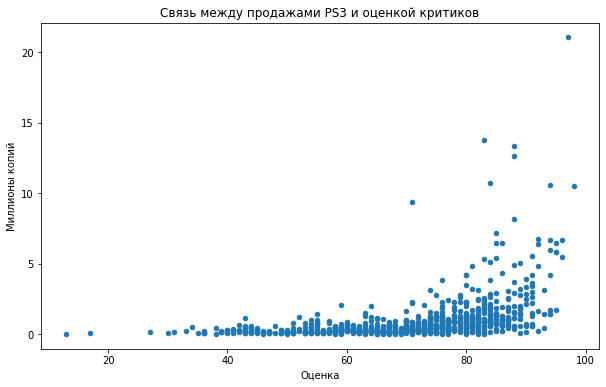

In [27]:
# диаграмма рассеяния для продаж PS3 и оценкой критиков
df_games_ps3c = df_games[(df_games['platform'] == 'PS3') & (df_games['critic_score'] > 0)].copy()
df_games_ps3c.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,6))
plt.title('Связь между продажами PS3 и оценкой критиков')
plt.xlabel('Оценка')
plt.ylabel('Миллионы копий')
plt.show()

In [28]:
# Коэффициент корреляции между отзывами критиков и продажами
print("Коэффициент корреляции между отзывами критиков и продажами:", \
    df_games_ps3c['critic_score'].corr(df_games_ps3c['total_sales']))

Коэффициент корреляции между отзывами критиков и продажами: 0.4324315685642061


Корреляция в 0.43 говорит о наличии прямой линейной связи, однако, не слишком сильной. Выходит, чем выше оценка критиков, тем больше копий продано.

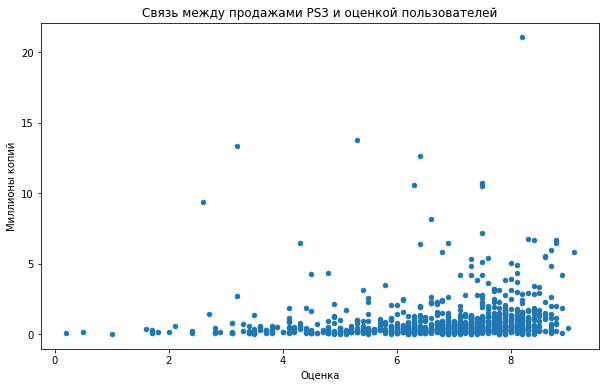

In [29]:
# диаграмма рассеяния для PS3 и оценкой пользователей
df_games_ps3u = df_games[(df_games['platform'] == 'PS3') & (df_games['user_score'] > 0)].copy()
df_games_ps3u.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,6))
plt.title('Связь между продажами PS3 и оценкой пользователей')
plt.xlabel('Оценка')
plt.ylabel('Миллионы копий')
plt.show()

In [30]:
# Коэффициент корреляции между отзывами пользователей и продажами
print("Коэффициент корреляции между отзывами пользователей и продажами:", \
    df_games_ps3u['user_score'].corr(df_games_ps3u['total_sales']))

Коэффициент корреляции между отзывами пользователей и продажами: 0.12669133936341712


Корреляция в 0.12 говорит, что скорее всего, особой связи между оценкой пользователей  и продажами нет. То есть, покупатели больше прислушиваются к отзывам критиков.

Посчитаю корреляции для других платформ

In [31]:
# посчитаю корреляции для других платформ
df_temp1 = df_games[['platform', 'critic_score', 'user_score', 'total_sales']]

# строки с ненулевыми оценками критиков
df_temp2 = df_temp1[df_temp1['critic_score'] > 0]
# вычисления корреляции добавлю в таблицу на основе продающихся в 2016 году платформ
df_platforms_2016 = pd.DataFrame(ser_platforms_2016).rename(columns={2016:"sales_2016"})
corr_lst = []
# корреляция по платформам
for pl in df_platforms_2016.index: 
    df_temp3 = df_temp2[df_temp2['platform'] == pl]
    corr_lst.append(df_temp3['critic_score'].corr(df_temp3['total_sales']))
df_platforms_2016['corr_critic'] = corr_lst

# строки с ненулевыми оценками пользователей 
df_temp2 = df_temp1[df_temp1['user_score'] > 0]
# df_platforms_2016 = pd.DataFrame(ser_platforms_2016).rename(columns={2016:"sales_2016"})
corr_lst = []
# корреляция по платформам
for pl in df_platforms_2016.index: 
    df_temp3 = df_temp2[df_temp2['platform'] == pl]
    corr_lst.append(df_temp3['user_score'].corr(df_temp3['total_sales']))
df_platforms_2016['corr_user'] = corr_lst

df_platforms_2016

,sales_2016,corr_critic,corr_user
PS4,69.25,0.406568,-0.031957
XOne,26.15,0.416998,-0.068925
3DS,15.14,0.349401,0.224808
PC,5.25,0.256887,0.010476
WiiU,4.60,0.348380,0.400219
PSV,4.25,0.131517,0.013580
PS3,3.60,0.432432,0.126691
X360,1.52,0.393736,0.114459
Wii,0.18,0.177560,0.112414


Похожие результаты получаются и для других платформ. Выделяются платформы WII и 3DS, по которым зависимость не такая большая. 

**Вывод:** связь между оценкой критиков и продажами гораздо сильнее связи между оценкой пользователей и продажами. Покупатели больше прислушиваются к отзывам критиков.

### Распределение игр по жанрам
Посмотрим на общее распределение игр по жанрам: самые прибыльные жанры, жанры с высокими и низкими продажами.

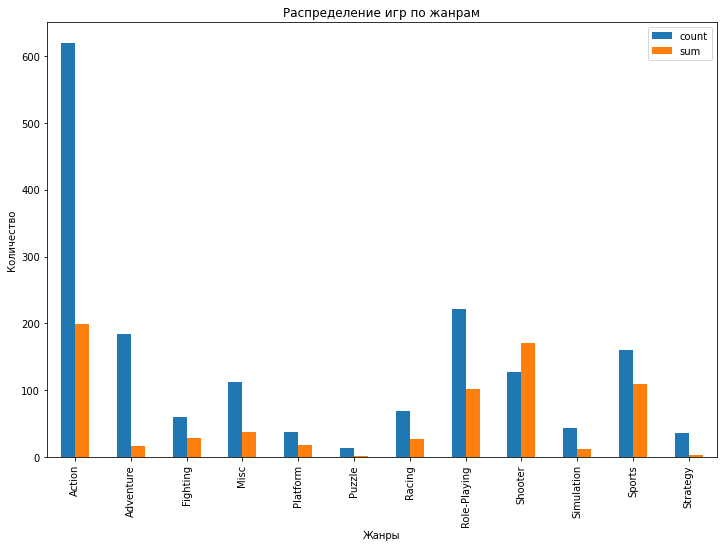

In [32]:
# группировка игр по жанрам, подсчет количества игр, общих, средних и медианных продаж 2014-2016гг 
df_genres = df_games_modern.groupby('genre').agg({'name': 'count', 'total_sales': ['sum', 'mean', 'median']})
# удалю мультииндекс
df_genres.columns = df_genres.columns.droplevel()
# полученные значения отличаются в сотни раз, поэтому изображу их на разных графиках
# столбчатая диаграмма для количества игр на платформе и общей суммы продаж 
df_genres[['count', 'sum']].plot.bar(figsize=(12, 8))
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество')
plt.show()

In [33]:
# количество выпущенных игр по жанрам
df_genres['count'].sort_values(ascending=False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: count, dtype: int64

По количеству игр на рынке 2014-2016 с большим отрывом лидирует жанр Action. Затем идут Role-Playing, Adventure и Sports.

Аутсайдеры: Puzzle, Strategy, Simulation, Platform.

In [34]:
# количество проданных копий игр по жанрам
df_genres['sum'].sort_values(ascending=False)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: sum, dtype: float64

По количеству проданных копий лидеры: Action, Shooters, Sports, Role-Playing. 

Аутсайдеры те же: Puzzle, Strategy, Simulation.

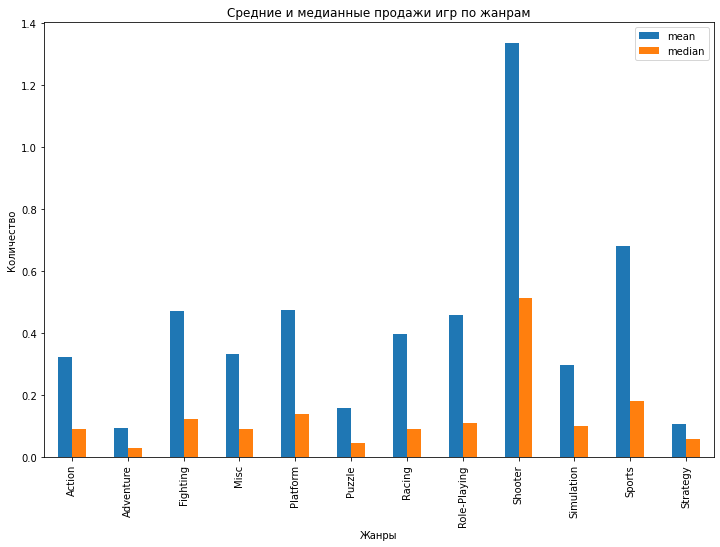

In [35]:
# средние и медианные продажи по жанрам
df_genres[['mean', 'median']].plot.bar(figsize=(12, 8))
plt.title('Средние и медианные продажи игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество')
plt.show()

In [36]:
# средние продажи по жанрам
df_genres['mean'].sort_values(ascending=False)

genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: mean, dtype: float64

In [37]:
# медианные продажи по жанрам
df_genres['median'].sort_values(ascending=False)

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: median, dtype: float64

Жанр Shooter - абсолютный лидер по средним продажам в 2014-2016 годах - 1.33 млн.копий. Далее следуют жанры Sports 0.68 млн.копий, Platform 0.47 млн.копий. Эти же жанры лидируют в медианных продажах. Аутсайдеры: Strategy, Puzzle, 
Adventure.

Таким образом, самые прибыльные жанры 2014-2016: Shooter, Sports, Platform.

## Портрет пользователя каждого региона
Определю для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). посмотрю на различия в долях продаж.

In [38]:
# продажи по платформам в разных регионах
df_games_na = df_games_modern.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
df_games_eu = df_games_modern.groupby('platform')['eu_sales'].sum() #.sort_values(ascending=False)
df_games_jp = df_games_modern.groupby('platform')['jp_sales'].sum() #.sort_values(ascending=False)

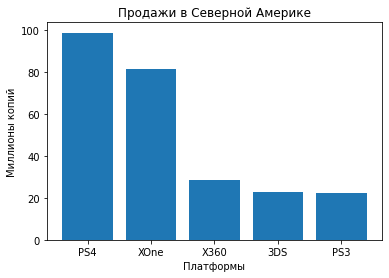

In [39]:
# лидеры продаж в Северной Америке
df_games_na5 = df_games_na.head(5)
#df_games_na5
plt.bar(df_games_na5.index, df_games_na5.values)
plt.title('Продажи в Северной Америке')
plt.xlabel('Платформы')
plt.ylabel('Миллионы копий')
plt.show()

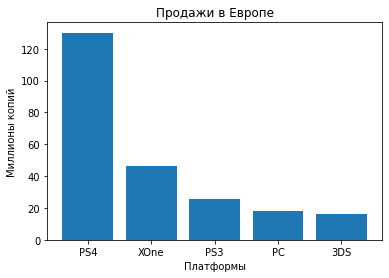

In [40]:
# лидеры продаж в Европе
df_games_eu5 = df_games_eu.sort_values(ascending=False).head(5)
plt.bar(df_games_eu5.index, df_games_eu5.values)
plt.title('Продажи в Европе')
plt.xlabel('Платформы')
plt.ylabel('Миллионы копий')
plt.show()

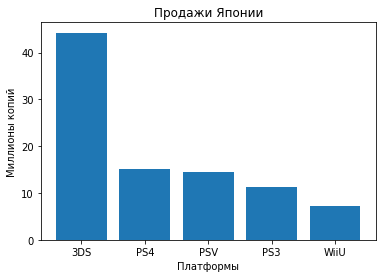

In [41]:
# лидеры продаж в Японии
df_games_jp5 = df_games_jp.sort_values(ascending=False).head(5)
plt.bar(df_games_jp5.index, df_games_jp5.values)
plt.title('Продажи Японии')
plt.xlabel('Платформы')
plt.ylabel('Миллионы копий')
plt.show()

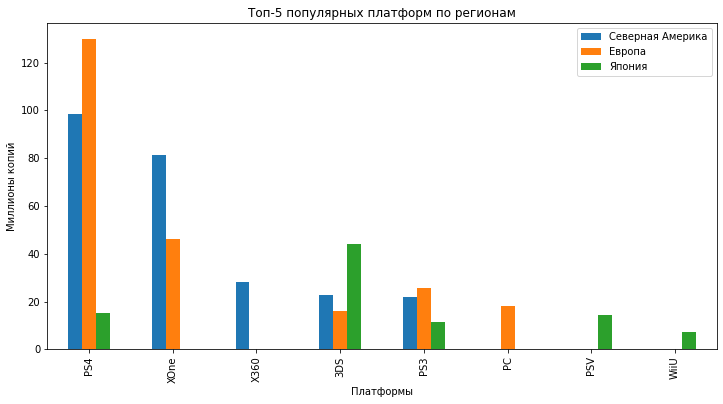

In [42]:
# Посмотрю на одном графике
df = pd.concat([df_games_na5, df_games_eu5, df_games_jp5], axis=1)
df.plot.bar(figsize=(12, 6))
plt.title('Топ-5 популярных платформ по регионам')
plt.xlabel('Платформы')
plt.ylabel('Миллионы копий')
plt.legend(['Северная Америка', 'Европа', 'Япония'])
plt.show()

Интересно, что в разных регионах разные лидеры. Самые популярные платформы
* в Северной Америке PS4, XOne, X360, 3DS, PS3
* в Европе PS4, XOne, PS3, PC, 3DS  
* в Японии 3DS, PS4, PSV, PS3, WiiU.

Популярная в Северной Америке и в Европе XOne не вошли в топ в Японии. И наоборот, популярная в Японии 3DS мало известна в Северной Америке и Европе. Успешнее всех на рынке платформа PS3, PS4. Она - лидер по всему миру. По количеству проданных копий лидирует Европа.

### Популярные жанры
Самые популярные жанры (топ-5).

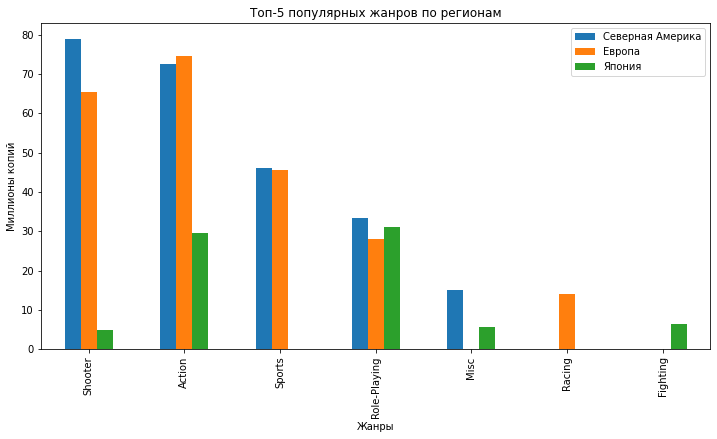

In [43]:
# продажи по жанрам в разных регионах
df_genre_na = df_games_modern.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
df_genre_eu = df_games_modern.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
df_genre_jp = df_games_modern.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
# график
df = pd.concat([df_genre_na, df_genre_eu, df_genre_jp], axis=1)
df.plot.bar(figsize=(12, 6))
plt.title('Топ-5 популярных жанров по регионам')
plt.legend(['Северная Америка', 'Европа', 'Япония'])
plt.xlabel('Жанры')
plt.ylabel('Миллионы копий')
plt.show()

Североамериканские и европейские предпочтения жанров почти совпадают: Shooter, Action, Sports, Role-Playing. Первые выбирают Misc, а вторые любят Rasing, который не входит больше нигде в топ-5.

Самые популярные жанры в Японии: Role-Playing, Action, Fighting, Misc, Shooter.

### Влияние ли рейтинга ESRB на продажи

In [44]:
# Все значения рейтинга ESRB
df_games_modern['rating'].dropna().unique()

array(['M', 'E', 'T', 'E10+'], dtype=object)

Расшифровка обозначений рейтинга ESRB:
* «EC» — «Для детей младшего возраста»
* «E», «K-A» — «Для всех» или от 6 лет 
* «E10+» — «Для всех от 10 лет и старше»
* «T» — «Подросткам» от 13 лет
* «M» — «Для взрослых» старше 17 лет 
* «AO» — «Только для взрослых» старше 18 лет 
* «RP» — «Рейтинг ожидается»

«K-A» - первоначальное названия рейтинга «E». В данных присутствуют оба обозначения. Заменю на "E".

«RP» — «Рейтинг ожидается» дает нам не больше информации, чем пропущенные значения. Заменю пропуски этим значением. Кроме того составлю словарь, который поможет в расшифровке рейтинга ESRB.

In [45]:
# замена устаревших значений K-A на E в столбце с рейтингом ESRB
#df_games.loc[df_games['rating'] == 'K-A', 'rating'] = 'E'
# замена пропусков в столбце с рейтингом ESRB на RP
#df_games.loc[df_games['rating'].isna(), 'rating'] = 'RP'
df_games_modern.loc[df_games_modern['rating'].isna(), 'rating'] = 'RP'

In [46]:
# словарь-расшифровка рейтинга ESRB.
dict_rating = {'E': 'Для всех',
               'EC': 'от 0', 
               'M': 'от 17', 
               'T': 'от 13', 
               'E10+': 'от 10', 
               'AO': 'от 18', 
               'RP': 'не опр.'}
df_games_modern['rating'] = df_games_modern['rating'].map(dict_rating)
#df_games['rating']

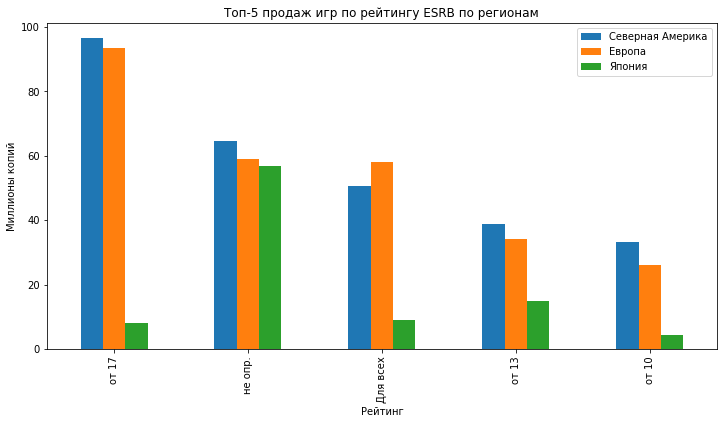

In [47]:
# продажи по рейтингу ESRB в разных регионах
df_rating_na = df_games_modern.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
df_rating_eu = df_games_modern.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
df_rating_jp = df_games_modern.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
# график
df1 = pd.concat([df_rating_na, df_rating_eu, df_rating_jp], axis=1)
df1.plot.bar(figsize=(12, 6))
plt.title('Топ-5 продаж игр по рейтингу ESRB по регионам')
plt.legend(['Северная Америка', 'Европа', 'Япония'])
plt.xlabel('Рейтинг')
plt.ylabel('Миллионы копий')
plt.show()

В 2014-2016 годах в Северной Америке и Европе распределение продаж по рейтингу игр почти одинаково. Большая часть продаваемых с игр имеет рейтинг "от 17", немного отстают продажи игр с "неопределенным" рейтингом. Далее идут продажи игр "Для всех", "от 13" и "от 10".

В Японии на первом месте продажи игр с "неопределенным" рейтингом. Затем "от 13", "Для всех", "от 17" и "от 10". 

## Проверка гипотез
### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Cформулирую нулевую гипотезу H₀: средние пользовательские рейтинги платформ Xbox One и PC равны. Альтернативная гипотеза H₁: средние пользовательские рейтинги платформ Xbox One и PC различаются.

Воспользуюсь методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind. Пороговое значение alpha задам 0.05.

In [48]:
# срез данных: платформа XOne и ненулевые оценки пользователей  
df_games_xone = df_games_modern.query('platform == "XOne"')
df_user_xone = df_games_xone.query('user_score > 0')
user_xone = df_user_xone['user_score']

# срез данных: платформа PC и ненулевые оценки пользователей
df_games_pc = df_games_modern.query('platform == "PC"')
df_user_pc = df_games_pc.query('user_score > 0')
user_pc = df_user_pc['user_score']

In [49]:
# проверка гипотезы о равенстве средних двух независимых совокупностей
# критический уровень статистической значимости
alpha = 0.05 
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    user_xone, 
    user_pc,
    equal_var = False,  # дисперсии не равны
    nan_policy='omit') # игнорировать NaN

print('Гипотеза H₀: средние пользовательские рейтинги платформ Xbox One и PC равны.')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Гипотеза H₀: средние пользовательские рейтинги платформ Xbox One и PC равны.
p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


То есть вероятность получить наблюдаемые средние пользовательские рейтинги платформ Xbox One и PC совершенно случайно при условии, что нулевая гипотеза верна, равна 0,11. Что достаточно вероятно. Поэтому предположение о равенстве средних пользовательских рейтингов платформ Xbox One и PC не отвергнуто.

### Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Cформулирую нулевую гипотезу H₀: средние пользовательские рейтинги жанров Action и Sports равны. Альтернативная гипотеза H₁: средние пользовательские рейтинги жанров Action и Sports различаются.

Воспользуюсь методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind. Пороговое значение alpha задам 0.05.

In [50]:
# срез данных: жанр Action и ненулевые оценки пользователей  
df_user_action = df_games_modern[(df_games_modern['genre'] == 'Action') & (df_games_modern['user_score'] > 0)].copy()
user_action = df_user_action['user_score']

# срез данных: жанр Sports и ненулевые оценки пользователей
df_user_sports = df_games_modern[(df_games_modern['genre'] == 'Sports') & (df_games_modern['user_score'] > 0)].copy()
user_sports = df_user_sports['user_score']

In [51]:
# проверка гипотезы о равенстве средних двух независимых совокупностей
# критический уровень статистической значимости
alpha = 0.05 
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    user_action, 
    user_sports,
    equal_var = False,  # дисперсии не равны
    nan_policy='omit') # игнорировать NaN

print('Гипотеза H₀: средние пользовательские рейтинги жанров Action и Sports равны.')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Гипотеза H₀: средние пользовательские рейтинги жанров Action и Sports равны.
p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


P-value - это вероятность получить наблюдаемые средние пользовательские рейтинги жанров Action и Sports совершенно случайно при условии, что нулевая гипотеза верна. Полученная вероятность очень мала. Поэтому предположение о равенстве средних пользовательских рейтингов жанров Action и Sports отвергнуто.

## Вывод
В проведенном исследовала изучила мировой рынок компьютерных игр. Расчитала  суммарные продажи  во всех регионах. Изучила, сколько игр выпускалось в разные годы. В 2002 году произошел резкий рост продаж игр с 500 до 1400 млн копий и спад в 2010 году до 600 млн копий, связанный с распространением смартфонов.  

По продажам за все время самыми успешными стали платформы с продажами в млн. копий:  
* PS2     1255.77
* X360     971.42
* PS3      939.65
* Wii      907.51
* DS       806.12
* PS       730.86

Эти платформы заметно оторвались от остальных. Но их время уже прошло. Среднее время жизни одной платформы составляет 11 лет. Так как компьютерные игры - динамично меняющаяся индустрия, то актуальным для наблюдения можно определить период в 2-3 года: с 2014 по 2016 годы.

В 2016 году больше всего продаж у платформ PS4, XOne, 3DS. График показывает, что количество проданных игр и для этих платформ снижается. Рынок игр падает. 

Расчеты показывают, что между оцекой критиков и продажами есть связь: чем выше оценка критиков, тем больше копий игры продано. В то время как оценка пользователей не влияет на продажи.

В 2014-2016 выпущено больше всего игр в жанре Action. Затем идут Role-Playing, Shooter и Sports. Жанр Shooter - абсолютный лидер по средним продажам. Далее следуют жанры Sports и Role-Playing. Эти же жанры лидируют в медианных продажах. Аутсайдеры: Strategy, Puzzle, Misc. Таким образом, самые прибыльные жанры 2014-2016: Shooter, Sports, Role-Playing.

В разных регионах разные лидеры. Самые популярные платформы:
* в Северной Америке PS4, XOne, X360, 3DS, PS3
* в Европе PS4, XOne, PS3, PC, 3DS
* в Японии 3DS, PS4, PSV, PS3, WiiU.

Успешнее всех на рынке платформа PS3, PS4. Она - лидер по всему миру. По количеству проданных копий лидирует Европа.

Самые популярные жанры 
* в Северной Америке:  Shooter, Action, Sports, Role-Playing, Misc
* в Европе: Shooter, Action, Sports, Role-Playing, Rasing 
* в Японии: Role-Playing, Action, Fighting, Misc, Shooter.

Распределение продаж по рейтингу игр в Северной Америке и Европе одинаково: "Для всех", "неопределен", "от 13", "от 17" и "от 10".
В Японии: "неопределен", "Для всех", "от 13", "от 17" и "от 10".

Проверила следующие гипотезы:

"Средние пользовательские рейтинги платформ Xbox One и PC равны". Гипотезу отвергнуть не получилось.

Гипотеза "Средние пользовательские рейтинги жанров Action и Sports равны." отвергнута.